In [1]:
# Importing dependencies for comunicating with sqlite db
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine,inspect, func, desc
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
import pyodbc
import sqlalchemy as sa
import urllib
import pandas as pd
import os

In [2]:
# Create engine to connect to Sensors.db
engine = create_engine('sqlite:///Sensors.db', echo=False)
Base = automap_base()

In [3]:
# Using Base.prepare and Base.classes we will reflect DB into ORM classes
Base.prepare(engine, reflect=True)
Base.classes.keys()

['BME_DATA']

In [4]:
# Explore database with inspector
inspector = inspect(engine)
inspector.get_table_names()

['BME_DATA']

In [5]:
# Save the refference from table BME_DATA
Rambo = Base.classes.BME_DATA

In [6]:
# Create db sesion object
session = Session(engine)

In [7]:
df = pd.read_sql_query("SELECT * FROM BME_DATA ORDER BY TIME_STAMP", engine)

In [8]:
df.head()

,id,TIME_STAMP,TEMPERATURE,GAS,HUMIDITY,PRESSURE,ALTITUDE
0,1,2019-04-09 22:51:21.496114,75.0,100,50.0,1000.0,1000.0
1,2,2019-04-09 22:51:31.220794,20.2,723933,84.1,976.3,312.3
2,3,2019-04-09 23:51:31.458662,20.0,723933,86.2,976.3,312.4
3,4,2019-04-10 00:51:31.550436,19.7,723933,86.4,976.3,312.2
4,5,2019-04-10 01:51:31.782320,19.2,723933,87.1,976.4,311.5


In [9]:
# Convert time into datetime
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

In [10]:
 #Using funciton to convert string into date time
from datetime import datetime, timedelta

def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

In [11]:
# converting fro all values in entire column
df['TIME_STAMP'] = df['TIME_STAMP'].apply(hour_rounder)

In [12]:
# converting temperature from C to f
df['TEMPERATURE'] = round((df['TEMPERATURE']* 9/5) + 32)

In [13]:
# Deleting the wrong input at the first row
df = df.iloc[1:]
df.head()

,id,TIME_STAMP,TEMPERATURE,GAS,HUMIDITY,PRESSURE,ALTITUDE
1,2,2019-04-09 23:00:00,68.0,723933,84.1,976.3,312.3
2,3,2019-04-10 00:00:00,68.0,723933,86.2,976.3,312.4
3,4,2019-04-10 01:00:00,67.0,723933,86.4,976.3,312.2
4,5,2019-04-10 02:00:00,67.0,723933,87.1,976.4,311.5
5,6,2019-04-10 03:00:00,66.0,723933,86.8,976.5,310.9


In [14]:
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

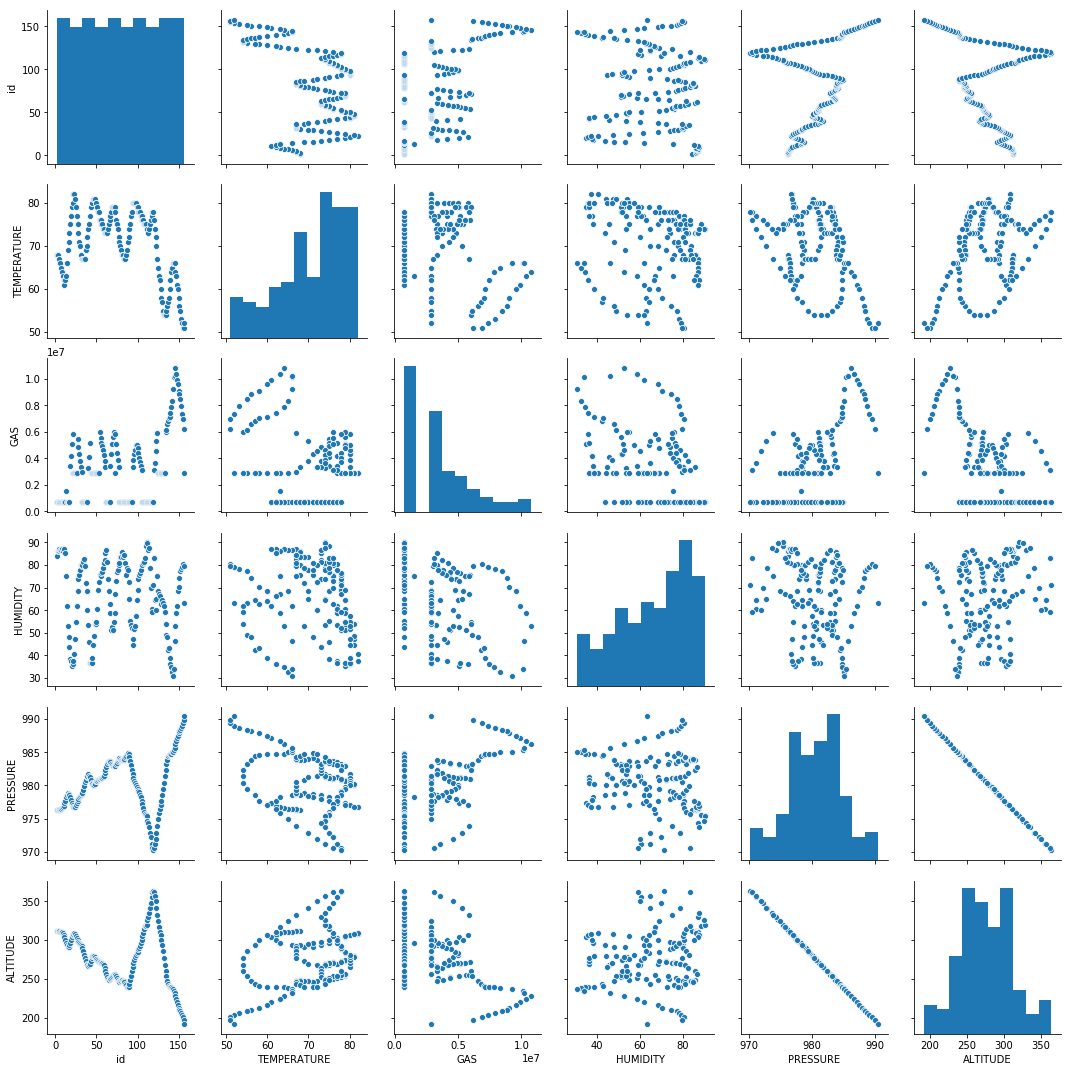

In [15]:
sns.pairplot(df)

C:\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


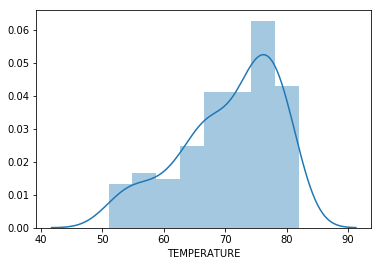

In [16]:
# Exploring the temperature variable
sns.distplot(df["TEMPERATURE"])

In [17]:
# Corelation between variables in data set
df.corr()

,id,TEMPERATURE,GAS,HUMIDITY,PRESSURE,ALTITUDE
id,1.000000,-0.427016,0.501611,-0.090359,0.311641,-0.310599
TEMPERATURE,-0.427016,1.000000,-0.278910,-0.177659,-0.375884,0.375222
GAS,0.501611,-0.278910,1.000000,-0.432576,0.476363,-0.476230
HUMIDITY,-0.090359,-0.177659,-0.432576,1.000000,-0.154166,0.154505
PRESSURE,0.311641,-0.375884,0.476363,-0.154166,1.000000,-0.999973
ALTITUDE,-0.310599,0.375222,-0.476230,0.154505,-0.999973,1.000000


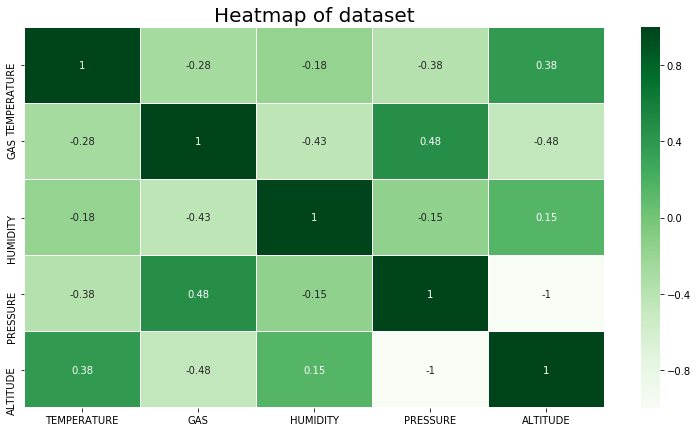

In [18]:
# Producing corelation heatmap between all avaliable data
plt.rcParams['figure.figsize']=(13,7)
heat_map = sns.heatmap(df[["TEMPERATURE","GAS","HUMIDITY","PRESSURE","ALTITUDE"]].corr(), annot = True, linewidths=.5, cmap='Greens')
heat_map.set_title(label='Heatmap of dataset', fontsize=20)
heat_map